In [1]:
import jax.numpy as jnp
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from pickle_save import load

In [2]:
from pathlib import Path
cdir = Path('experiment_results')
exp_dirs = [d for d in cdir.iterdir() if d.is_dir()]

In [3]:
metrics = [
    'u_error_onestep',
    'u_error_interp',
    '1step_op_errors',
    '2step_op_errors',
    '1step_forward_errors',
    '2step_forward_errors'
]
result_dict = {}
for exp_dir in exp_dirs:
    if (exp_dir / 'error_results.pickle').exists():
        settings = load(exp_dir / 'settings.pickle')
        result_dict[(settings['num_functions'],settings['random_seed'],settings['samples_per_functions'])] = (
            load(exp_dir / 'error_results.pickle')
        )
    
full_results = {x:{m:float(result_dict[x][m].mean()) for m in metrics} for x in result_dict.keys()}
df_results = pd.DataFrame(full_results).T
df_results.index.names = ['num_functions','seed','num_obs']

mean_results = df_results.reset_index().groupby(['num_functions','num_obs']).mean().drop('seed',axis=1).reset_index()

std_results = df_results.reset_index().groupby(['num_functions','num_obs']).std().drop('seed',axis=1).reset_index()



In [4]:
mean_results[mean_results['num_obs']==5][['num_functions','u_error_onestep']]

,num_functions,u_error_onestep
0,2,0.507311
3,5,0.685028
6,10,0.869867
9,20,0.293891
12,30,0.650699
15,40,0.050243
18,50,0.049147


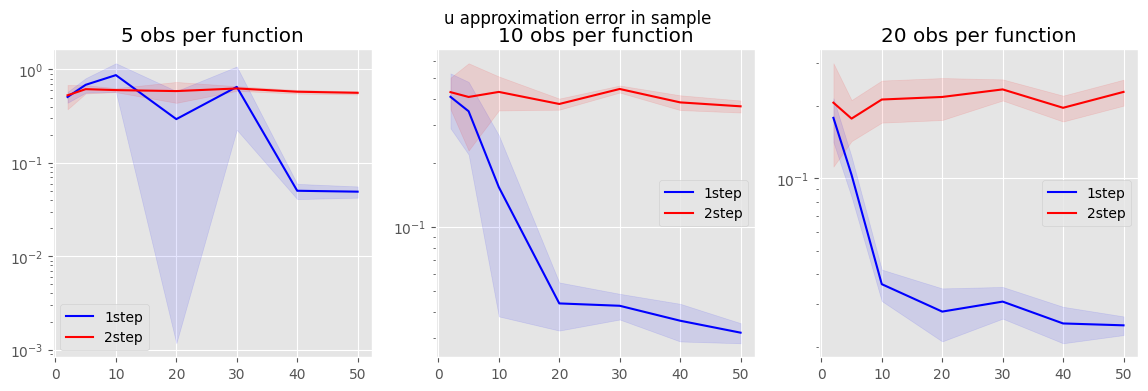

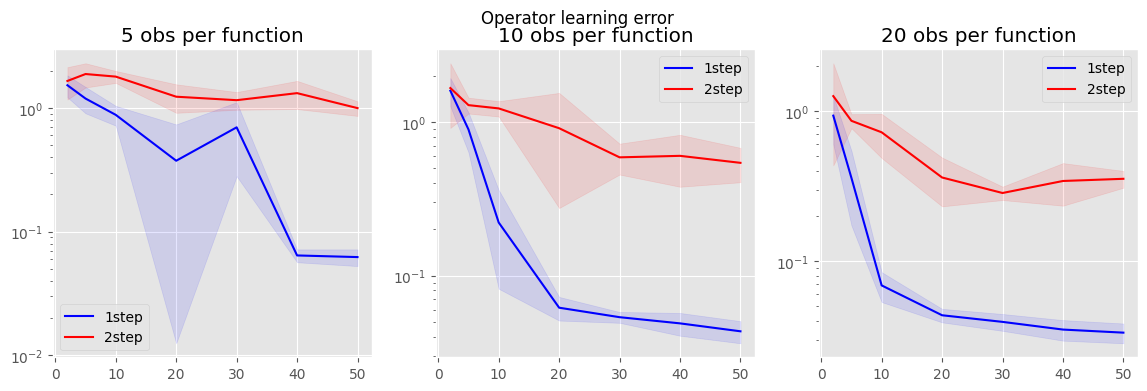

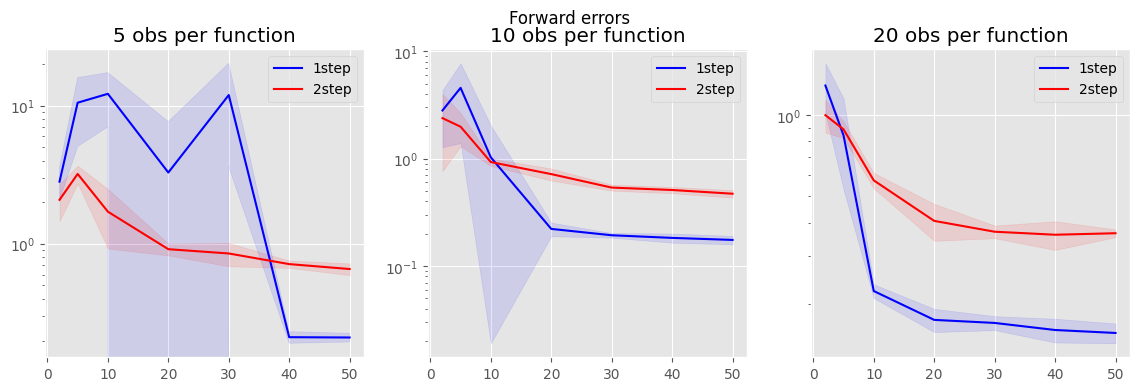

In [5]:
metric_onestep = 'u_error_onestep'
metric_twostep = 'u_error_interp'
suptitle = 'u approximation error in sample'

def plot_comparison(metric_onestep,metric_twostep,suptitle):
    plt.figure(figsize=(14,4))
    plt.suptitle(suptitle)
    for i,k_obs in enumerate([5,10,20]):
        plt.subplot(1,3,i+1)
        plt.title(f"{k_obs} obs per function")
        onestep_mean = mean_results[mean_results['num_obs']==k_obs].set_index('num_functions')[metric_onestep]
        onestep_std = std_results[std_results['num_obs']==k_obs].set_index('num_functions')[metric_onestep]

        twostep_mean = mean_results[mean_results['num_obs']==k_obs].set_index('num_functions')[metric_twostep]
        twostep_std = std_results[std_results['num_obs']==k_obs].set_index('num_functions')[metric_twostep]

        plt.plot(onestep_mean,label = '1step',c = 'blue')
        plt.fill_between(onestep_mean.index,onestep_mean - onestep_std,onestep_mean + onestep_std,alpha = 0.1,color = 'blue')

        plt.plot(twostep_mean,label = '2step', c = 'red')
        plt.fill_between(twostep_mean.index,twostep_mean - twostep_std,twostep_mean + twostep_std,alpha = 0.1,color = 'red')
        plt.legend()
        plt.yscale('log')
    plt.show()

plotting_args = [
    ('u_error_onestep','u_error_interp','u approximation error in sample'),
    ('1step_op_errors','2step_op_errors','Operator learning error'),
    ('1step_forward_errors','2step_forward_errors','Forward errors')
    ]

for args in plotting_args:
    plot_comparison(*args)

# metric_onestep = '1step_op_errors'
# metric_twostep = '2step_op_errors'
# plt.figure(figsize=(14,4))
# plt.suptitle('Operator learning error')
# for i,k_obs in enumerate([5,10,20]):
#     plt.subplot(1,3,i+1)
#     plt.title(f"{k_obs} obs per function")
#     plt.plot(mean_results[mean_results['num_obs']==k_obs][metric_onestep],label = '1step')
#     plt.plot(mean_results[mean_results['num_obs']==k_obs][metric_twostep],label = '2step')
#     plt.legend()
#     plt.yscale('log')
# plt.show()

# metric_onestep = '1step_forward_errors'
# metric_twostep = '2step_forward_errors'
# plt.figure(figsize=(14,4))
# plt.suptitle('Forward errors')
# for i,k_obs in enumerate([5,10,20]):
#     plt.subplot(1,3,i+1)
#     plt.title(f"{k_obs} obs per function")
#     plt.plot(mean_results[mean_results['num_obs']==k_obs][metric_onestep],label = '1step')
#     plt.plot(mean_results[mean_results['num_obs']==k_obs][metric_twostep],label = '2step')
#     plt.legend()
#     plt.yscale('log')
# plt.show()

